<a href="https://colab.research.google.com/github/Sarvesh-Prajapati/data-analysis-pandas/blob/main/StackOverflowSurvey2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stack Overflow Survey Data 2019: Data Transformation & Analysis Using Pandas**

The Stack Overflow annual survey is a comprehensive study of the global developer community, providing insights into programming languages, technologies, remote work trends, job roles, work environments, educational backgrounds, and other developer demographics. It captures responses from thousands of developers worldwide.

Here, we've used the [Stack Overflow survey's data set for 2019](https://survey.stackoverflow.co/). The size of the raw data set is 88883 records across 85 attributes. After cleaning the data set with Pandas, its size reduced to 86197 records across 33 attributes.



---



# Dataset Loading

In [41]:
import pandas as pd
import numpy as np

In [42]:
# Reading the dataset and schema files from Colab's 'Files' tab

data_df = pd.read_csv('/content/survey_results_public_SOF2019.csv')
schema_df = pd.read_csv('/content/survey_results_schema_SOF2019.csv')   # schema contains info about column names of 'data_df'

In [43]:
# Checking the number of rows and columns in the two files

d_rows, d_cols = data_df.shape
s_rows, s_cols = schema_df.shape
print('data_df has', d_rows, 'rows and', d_cols, 'columns.')
print('schema_df has', s_rows, 'rows and', s_cols, 'columns.')

data_df has 88883 rows and 85 columns.
schema_df has 85 rows and 2 columns.


In [44]:
# Glancing at the survey data

data_df.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,...,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,...,"No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,...,"No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,...,"No, I've heard of them, but I am not part of a...",Neutral,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,...,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"10,000 or more employees",...,"No, I've heard of them, but I am not part of a...","Yes, definitely",Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [45]:
# Glancing at the schema to get a clearer context of the column labels of frame 'data_df'

schema_df.head(5)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


# Dataset Transformation & Cleaning

In [46]:
# Setting index columns in both dataframes

data_df.set_index('Respondent', inplace = True)
schema_df.set_index('Column', inplace = True)

In [ ]:
data_df.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [47]:
schema_df.head(3)

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?


**It should be evident by now that the column** 'QuestionText' **in frame** 'schema_df' **has questions that describe what the columns of dataset frame** 'data_df' **mean.**

In [48]:
# Making all columns of 'data_df' visible in the output to glance at

pd.set_option('display.max_columns', d_cols)
data_df.head(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult


In [91]:
cols_to_drop = ['OpenSourcer', 'OpenSource', 'EduOther', 'OrgSize',	'CareerSat', 'JobSat',
                'MgrIdiot', 'MgrMoney', 'MgrWant',	'LastHireDate', 'LastInt', 'FizzBuzz',
                'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq',
                'WorkWeekHrs', 'WorkChallenge', 'CodeRevHrs', 'UnitTests',
                'PurchaseHow', 'PurchaseWhat', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith',
                'MiscTechDesireNextYear', 'Containers', 'BlockchainOrg', 'BlockchainIs',
                'BetterLife', 'ITperson', 'OffOn', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo',
                'SOTimeSaved', 'SOHowMuchTime', 'SOPartFreq', 'SOJobs', 'EntTeams',
                'SOComm', 'WelcomeChange', 'SONewContent', 'Trans', 'Sexuality', 'Ethnicity', 'Dependents']

# len(cols_to_drop) # o/p: 51
data_df.drop(columns = cols_to_drop, inplace = True)

In [92]:
# Checking the 'data_df' frame's columns

pd.set_option('display.max_columns', d_cols)
# data_df.shape  # o/p: (88883, 25)
data_df.head(2)

,MainBranch,Hobbyist,Employment,Country,Student,EdLevel,UndergradMajor,DevType,YearsCode,Age1stCode,YearsCodePro,JobSeek,ConvertedComp,WorkPlan,WorkRemote,WorkLoc,ImpSyn,CodeRev,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,OpSys,SocialMedia,SOFindAnswer,SOAccount,Age,Gender,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,IntelliJ;Notepad++;PyCharm,Windows,Twitter,3-5 times per week,No,14.0,Man,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,I am actively looking for a job,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Atom;PyCharm,Windows,Instagram,3-5 times per week,Yes,19.0,Man,Appropriate in length,Neither easy nor difficult


**Now, let us get a bit more clarity on what the column names imply. For that, we need to look up the column names' description in frame** 'schema_df'.

In [95]:
final_cols = ['EdLevel', 'UndergradMajor', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'JobSeek', 'WorkPlan', 'CodeRev', 'ImpSyn', 'OpSys', 'SocialMedia' ]
for col in final_cols:
  print(col, ' : ', schema_df.loc[col, 'QuestionText'])

EdLevel  :  Which of the following best describes the highest level of formal education that you’ve completed?
UndergradMajor  :  What was your main or most important field of study?
DevType  :  Which of the following describe you? Please select all that apply.
YearsCode  :  Including any education, how many years have you been coding?
Age1stCode  :  At what age did you write your first line of code or program? (E.g., webpage, Hello World, Scratch project)
YearsCodePro  :  How many years have you coded professionally (as a part of your work)?
JobSeek  :  Which of the following best describes your current job-seeking status?
WorkPlan  :  How structured or planned is your work?
CodeRev  :  Do you review code as part of your work?
ImpSyn  :  For the specific work you do, and the years of experience you have, how do you rate your own level of competence?
OpSys  :  What is the primary operating system in which you work?
SocialMedia  :  What social media site do you use the most?


**Altering some column names to make the context more obvious.**

In [111]:
data_df.rename(columns = {'EdLevel' : 'HighestEdLevel', 'DevType' : 'YourDevType', 'YearsCode' : 'CodingExp',
                          'Age1stCode' : 'CodingSinceAge', 'YearsCodePro' : 'ProCodingExp', 'JobSeek' : 'SeekingJob', 'ConvertedComp' : 'SalaryUSD',
                          'WorkRemote' : 'RemoteWorkFreq', 'CodeRev' : 'CodeReviewerAtWork', 'ImpSyn' : 'SelfCompetenceLevel',
                          'OpSys' : 'MainOSUsed', 'SocialMedia' : 'MainSocialMedia'}, inplace = True)
data_df.head(1) # Just glancing at new column names

,MainBranch,Hobbyist,Employment,Country,Student,HighestEdLevel,UndergradMajor,YourDevType,CodingExp,CodingSinceAge,ProCodingExp,SeekingJob,SalaryUSD,WorkPlan,RemoteWorkFreq,WorkLoc,SelfCompetenceLevel,CodeReviewerAtWork,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,MainOSUsed,MainSocialMedia,SOFindAnswer,SOAccount,Age,Gender,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Student,Yes,"Not employed, and not looking for work",United Kingdom,No,Primary,NaN,NaN,4.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,IntelliJ;Notepad++;PyCharm,Windows,Twitter,3-5 times per week,No,14.0,Man,Appropriate in length,Neither easy nor difficult


In [98]:
# Check the no. of NaN/None vals in each column

[data_df.isna().sum()] # brackets make output more compactly visible

[MainBranch                  552
 Hobbyist                      0
 Employment                 1702
 Country                     132
 Student                    1869
 HighestEdLevel             2493
 UndergradMajor            13269
 YourDevType                7548
 CodingExp                   945
 CodingSinceAge             1249
 ProCodingExp              14552
 SeekingJob                 8328
 SalaryUSD                 33060
 WorkPlan                  19969
 RemoteWorkFreq            18599
 WorkLoc                   18828
 SelfCompetenceLevel       17104
 CodeReviewerAtWork        18493
 LanguageWorkedWith         1314
 LanguageDesireNextYear     4795
 DatabaseWorkedWith        12857
 DatabaseDesireNextYear    19736
 PlatformWorkedWith         8169
 PlatformDesireNextYear    11440
 DevEnviron                 1566
 MainOSUsed                 1032
 MainSocialMedia            4446
 SOFindAnswer               1067
 SOAccount                  1055
 Age                        9673
 Gender   

**Above output indicates a lot of columns have significant number of** NaN **values. Dropping all those** NaN **values at one go would greatly affect our analysis later on. So, we'll transform the values one column at a time.**

In [99]:
# Identifying unique values in column 'MainBranch'

data_df['MainBranch'].unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', nan],
      dtype=object)

In [112]:
# Altering the values in 'MainBranch'

data_df['MainBranch'] = data_df['MainBranch'].replace({'I am a student who is learning to code' : 'Student',
                               'I am not primarily a developer, but I write code sometimes as part of my work' : 'Amateur',
                               'I am a developer by profession' : 'Pro Developer',
                               'I code primarily as a hobby' : 'Hobbyist',
                               'I used to be a developer by profession, but no longer am' : 'Retired Developer'})
data_df['MainBranch'].unique()

array(['Student', 'Amateur', 'Pro Developer', 'Hobbyist',
       'Retired Developer', nan], dtype=object)

**Repeating above step for other columns henceforth:**

In [101]:
# Column 'HighestEdLevel'

data_df['HighestEdLevel'].unique()

array(['Primary/elementary school',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'Other doctoral degree (Ph.D, Ed.D., etc.)', nan,
       'Associate degree', 'Professional degree (JD, MD, etc.)',
       'I never completed any formal education'], dtype=object)

In [113]:
data_df['HighestEdLevel'] = data_df['HighestEdLevel'].replace({'Primary/elementary school' : 'Primary',
                               'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' : 'Secondary',
                               'Bachelor’s degree (BA, BS, B.Eng., etc.)' : 'Bachelors Degree',
                               'Some college/university study without earning a degree' : 'College/Uni & No Degree',
                               'Master’s degree (MA, MS, M.Eng., MBA, etc.)' : 'Masters Degree',
                               'Other doctoral degree (Ph.D, Ed.D., etc.)' : 'Doctoral Degree',
                                  'Associate degree' : 'Associate Degree', 'Professional degree (JD, MD, etc.)' : 'Professional Degree',
                                  'I never completed any formal education' : 'No formal education' })

data_df['HighestEdLevel'].unique()

array(['Primary', 'Secondary', 'Bachelors Degree',
       'College/Uni & No Degree', 'Masters Degree', 'Doctoral Degree',
       nan, 'Associate Degree', 'Professional Degree',
       'No formal education'], dtype=object)

In [103]:
# Column 'CodingExp'

data_df['CodingExp'].unique()

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', 'Less than 1 year', '30', '9', '26', '40', '19',
       '15', '20', '28', '25', '1', '22', '11', '33', '50', '41', '18',
       '34', '24', '23', '42', '27', '21', '36', '32', '39', '38', '31',
       '37', 'More than 50 years', '29', '44', '45', '48', '46', '43',
       '47', '49'], dtype=object)

In [114]:
# Above o/p shows all values in col 'CodingExp' are strings which can't be processed by aggregate functions during analysis
# so these values should be replaced suitably and then the column's dtype changed to float.

data_df['CodingExp'] = data_df['CodingExp'].replace({'Less than 1 year' : 0, 'More than 50 years' : 51, np.NaN : 0})
data_df['CodingExp'] = data_df['CodingExp'].astype(float)
data_df['CodingExp'].unique() # checking if the changes have effected

array([ 4.,  0.,  3., 16., 13.,  6.,  8., 12.,  2.,  5., 17., 10., 14.,
       35.,  7., 30.,  9., 26., 40., 19., 15., 20., 28., 25.,  1., 22.,
       11., 33., 50., 41., 18., 34., 24., 23., 42., 27., 21., 36., 32.,
       39., 38., 31., 37., 51., 29., 44., 45., 48., 46., 43., 47., 49.])

In [105]:
# Column 'CodingSinceAge'

data_df['CodingSinceAge'].unique()

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

In [115]:
data_df['CodingSinceAge'] = data_df['CodingSinceAge'].replace({'Younger than 5 years' : 4, 'Older than 85' : 86, np.NaN : 0})
data_df['CodingSinceAge'] = data_df['CodingSinceAge'].astype(float)
data_df['CodingSinceAge'].unique() # checking if the changes have effected

array([10., 17., 22., 16., 14., 15., 11., 20., 13., 18., 12., 19., 21.,
        8., 35.,  6.,  9., 29.,  7.,  5., 23., 30.,  0., 27., 24.,  4.,
       33., 25., 26., 39., 36., 38., 28., 31., 86., 32., 37., 50., 65.,
       42., 34., 40., 67., 43., 44., 60., 46., 45., 49., 51., 41., 55.,
       83., 48., 53., 54., 47., 56., 79., 61., 68., 77., 66., 52., 80.,
       62., 84., 57., 58., 63.])

In [107]:
# Column 'ProCodingExp'

data_df['ProCodingExp'].unique()

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

In [116]:
data_df['ProCodingExp'] = data_df['ProCodingExp'].replace({'Less than 1 year' : 0, 'More than 50 years' : 51, np.NaN : 0})
data_df['ProCodingExp'] = data_df['ProCodingExp'].astype(float)
data_df['ProCodingExp'].unique() # checking if the changes have effected

array([ 0.,  1.,  9.,  3.,  4., 10.,  8.,  2., 13., 18.,  5., 14., 22.,
       23., 19., 35., 20., 25.,  7., 15., 27.,  6., 48., 12., 31., 11.,
       17., 16., 21., 29., 30., 26., 33., 28., 37., 40., 34., 24., 39.,
       38., 36., 32., 41., 45., 43., 51., 44., 42., 46., 49., 50., 47.])

In [109]:
# Quantifying the col 'SelfCompetenceLevel' on scale 0-10, 5 being average.

data_df['SelfCompetenceLevel'].unique()

array([nan, 'Average', 'A little below average', 'A little above average',
       'Far above average', 'Far below average'], dtype=object)

In [117]:
data_df['SelfCompetenceLevel'] = data_df['SelfCompetenceLevel'].replace({'Average' : 5,
                                                                         'A little below average' : 4,
                                                                         'A little above average' : 6,
                                                                         'Far above average' : 9,
                                                                         'Far below average' : 2, np.NaN : 0})
data_df['SelfCompetenceLevel'] = data_df['SelfCompetenceLevel'].astype(float)
data_df['SelfCompetenceLevel'].unique() # checking if the changes have effected

array([0., 5., 4., 6., 9., 2.])

In [118]:
# Identifying and then replacing non-English characters from column 'MainSocialMedia'

data_df['MainSocialMedia'].unique()

array(['Twitter', 'Instagram', 'Reddit', 'Facebook', 'YouTube', nan,
       'VK ВКонта́кте', 'WhatsApp', "I don't use social media",
       'WeChat 微信', 'LinkedIn', 'Snapchat', 'Weibo 新浪微博', 'Hello',
       'Youku Tudou 优酷'], dtype=object)

In [119]:
data_df['MainSocialMedia'] = data_df['MainSocialMedia'].replace({'Weibo 新浪微博' : 'Weibo', 'WeChat 微信' : 'WeChat', 'Youku Tudou 优酷' : 'Youku Tudou'})
data_df['MainSocialMedia'].unique()

array(['Twitter', 'Instagram', 'Reddit', 'Facebook', 'YouTube', nan,
       'VK ВКонта́кте', 'WhatsApp', "I don't use social media", 'WeChat',
       'LinkedIn', 'Snapchat', 'Weibo', 'Hello', 'Youku Tudou'],
      dtype=object)

In [132]:
# Column 'SurveyEase'
# data_df['SurveyEase'].unique() # array(['Neither easy nor difficult', 'Easy', 'Difficult', nan], dtype=object)

data_df['SurveyEase'] = data_df['SurveyEase'].replace({'Neither easy nor difficult' : 'Moderate'})
data_df['SurveyEase'].unique()

array(['Moderate', 'Easy', 'Difficult', nan], dtype=object)

In [122]:
# Column 'Employment'

data_df['Employment'].unique()

array(['Not employed, and not looking for work',
       'Not employed, but looking for work', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed', nan,
       'Employed part-time', 'Retired'], dtype=object)

In [123]:
data_df['Employment'] = data_df['Employment'].replace({'Not employed, and not looking for work' : 'Unemployed',
       'Not employed, but looking for work' : 'Job-seeker', 'Employed full-time' : 'Full-time',
       'Independent contractor, freelancer, or self-employed' : 'Self-employed',
       'Employed part-time' : 'Part-time'})
data_df['Employment'].unique()

array(['Unemployed', 'Job-seeker', 'Full-time', 'Self-employed', nan,
       'Part-time', 'Retired'], dtype=object)

In [125]:
# Column 'SeekingJob'

data_df['SeekingJob'].unique()

array([nan, 'I am actively looking for a job',
       'I’m not actively looking, but I am open to new opportunities',
       'I am not interested in new job opportunities'], dtype=object)

In [127]:
data_df['SeekingJob'] = data_df['SeekingJob'].replace({'I am actively looking for a job' : 'Yes',
       'I’m not actively looking, but I am open to new opportunities' : 'Casually',
       'I am not interested in new job opportunities' : 'No'})
data_df['SeekingJob'].unique()

array([nan, 'Yes', 'Casually', 'No'], dtype=object)

In [128]:
# Column 'WorkPlan'

data_df['WorkPlan'].unique()

array([nan,
       "There's no schedule or spec; I work on what seems most important or urgent",
       'There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely',
       'There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns'],
      dtype=object)

In [129]:
data_df['WorkPlan'] = data_df['WorkPlan'].replace({"There's no schedule or spec; I work on what seems most important or urgent" : 'Impromptu',
       'There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely' : 'Fully Scheduled',
       'There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns' : 'Partly Scheduled'})
data_df['WorkPlan'].unique()

array([nan, 'Impromptu', 'Fully Scheduled', 'Partly Scheduled'],
      dtype=object)

In [131]:
# Column 'CodeReviewerAtWork'

# data_df['CodeReviewerAtWork'].unique()  # o/p : array([nan, 'No', 'Yes, because I see value in code review', 'Yes, because I was told to do so'], dtype=object)

data_df['CodeReviewerAtWork'] = data_df['CodeReviewerAtWork'].replace({'No' : 'No', 'Yes, because I see value in code review' : 'Yes',
                                                                       'Yes, because I was told to do so' : 'Yes'})
data_df['CodeReviewerAtWork'].unique()


array([nan, 'No', 'Yes'], dtype=object)

In [135]:
# Column 'MainOSUsed'

# data_df['MainOSUsed'].unique() # o/p : array(['Windows', 'Linux-based', 'MacOS', 'BSD', nan], dtype=object)

data_df['MainOSUsed'] = data_df['MainOSUsed'].replace({'Linux-based' : 'Linux'})
data_df['MainOSUsed'].unique()

array(['Windows', 'Linux', 'MacOS', 'BSD', nan], dtype=object)

In [147]:
# Column 'SOFindAnswer'

data_df.rename(columns = {'SOFindAnswer' : 'FindingAnsPerWeek'}, inplace = True)  # Renaming column

In [148]:
data_df['FindingAnsPerWeek'].unique()

array(['3-5 times per week', '6-10 times per week', '1-2 times per week',
       'More than 10 times per week', 'Less than once per week', nan],
      dtype=object)

In [149]:
data_df['FindingAnsPerWeek'] = data_df['FindingAnsPerWeek'].replace({'3-5 times per week' : '4.0', '6-10 times per week' : '8.0', '1-2 times per week' : '1.5',
       'More than 10 times per week' : '12.0', 'Less than once per week' : '0.5'})
# replacing str vals with int/float directly raises warning so replace with str values (e.g. '4.0' & not 4.0)
# later, change col's dtype to 'float' (as done below)

data_df['FindingAnsPerWeek'].unique()

array(['4.0', '8.0', '1.5', '12.0', '0.5', nan], dtype=object)

In [153]:
# Change dtype to float

data_df['FindingAnsPerWeek'] = data_df['FindingAnsPerWeek'].astype('float')
data_df['FindingAnsPerWeek'].unique()

array([ 4. ,  8. ,  1.5, 12. ,  0.5,  nan])

In [160]:
# Column 'SOAccount'

data_df.rename(columns = {'SOAccount' : 'HaveSOFAccount'}, inplace = True)  # Renaming column
data_df['HaveSOFAccount'].unique() # o/p : array(['No', 'Yes', "Not sure / can't remember", nan], dtype=object)

data_df['HaveSOFAccount'] = data_df['HaveSOFAccount'].replace({"Not sure / can't remember" : 'Unsure'})
data_df['HaveSOFAccount'].unique()

array(['No', 'Yes', 'Unsure', nan], dtype=object)

In [162]:
# Column 'Gender'

data_df['Gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [163]:
data_df['Gender'] = data_df['Gender'].replace({'Man' : 'Male', 'Woman' : 'Female', 'Non-binary, genderqueer, or gender non-conforming' : 'Queer',
                                               'Woman;Non-binary, genderqueer, or gender non-conforming' : 'Female',
                                               'Woman;Man;Non-binary, genderqueer, or gender non-conforming' : 'Queer',
                                               'Woman;Man' : 'Queer',
                                               'Man;Non-binary, genderqueer, or gender non-conforming' : 'Male'})
data_df['Gender'].unique()

array(['Male', nan, 'Female', 'Queer'], dtype=object)

In [ ]:
# Replacing 'United States' with 'USA' for the sake of typing convenience
data_df['Country'].replace({'United States': 'USA'}, inplace = True)

**Dropping rows having significant** NaN **values.**
<p>Let us identify rows that have significant count of NaN (say, 10+) across the columns.</p>

In [164]:
data_df.shape

(88883, 33)

In [165]:
# First, checking count of NaN in EACH row

nan_count_per_row = data_df.isna().sum(axis=1) # setting axis = 1 counts NaN in a row (i.e. left to right across cols)
nan_count_per_row

,0
Respondent,
1,8
2,7
3,2
4,0
5,1
...,...
88377,10
88601,28
88802,27


In [171]:
# No. of rows with NaN in 10+ columns out of 33 cols (i.e. ~30% of columns have no data in a row)

data_df[nan_count_per_row > 10].shape[0]

2686

In [175]:
# Dropping all 2686 rows from 'data_df'

data_df.drop(index = data_df[nan_count_per_row > 10].index, inplace = True)
data_df.shape

(86197, 33)

In [179]:
data_df.tail(3)

,MainBranch,Hobbyist,Employment,Country,Student,HighestEdLevel,UndergradMajor,YourDevType,CodingExp,CodingSinceAge,ProCodingExp,SeekingJob,SalaryUSD,WorkPlan,RemoteWorkFreq,WorkLoc,SelfCompetenceLevel,CodeReviewerAtWork,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,MainOSUsed,MainSocialMedia,FindingAnsPerWeek,HaveSOFAccount,Age,Gender,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
88282,NaN,Yes,Job-seeker,United States,No,College/Uni & No Degree,"Computer science, computer engineering, or sof...","Developer, back-end;Developer, desktop or ente...",38.0,10.0,38.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...,Bash/Shell/PowerShell;C;Go;HTML/CSS;JavaScript...,NaN,NaN,Linux,Linux;Raspberry Pi,Vim,Linux,I don't use social media,1.5,Yes,NaN,Male,Too short,Moderate
88377,NaN,Yes,Unemployed,Canada,No,Primary,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;SQLite,Firebase;MySQL;SQLite,Linux,Google Cloud Platform;Linux,Atom;Visual Studio;Visual Studio Code,Windows,YouTube,4.0,Yes,NaN,Male,Appropriate in length,Easy
88863,NaN,Yes,Unemployed,Spain,"Yes, full-time",Professional Degree,"Computer science, computer engineering, or sof...",NaN,8.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,C;C++;C#;HTML/CSS;Java;Objective-C;SQL;Swift,DynamoDB;MariaDB;Microsoft SQL Server;MySQL,MariaDB;MySQL;Oracle;SQLite,iOS;Linux;MacOS;WordPress,Android;AWS;Google Cloud Platform;IBM Cloud or...,Android Studio;Atom;Eclipse;NetBeans;Notepad++...,Linux,WhatsApp,8.0,Yes,18.0,Male,Appropriate in length,Easy


**Now that the index column** ('Respondent') **is no more ordered (has missing values 'cause of deletion of rows), we'll have to reset index, then drop the** 'Respondent' **column, and finally rename the new index as** 'Respondent'.

In [180]:
data_df.reset_index(inplace = True)
data_df.index += 1  # sets the index column to start from 1 instead of 0
data_df

,Respondent,MainBranch,Hobbyist,Employment,Country,Student,HighestEdLevel,UndergradMajor,YourDevType,CodingExp,CodingSinceAge,ProCodingExp,SeekingJob,SalaryUSD,WorkPlan,RemoteWorkFreq,WorkLoc,SelfCompetenceLevel,CodeReviewerAtWork,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,MainOSUsed,MainSocialMedia,FindingAnsPerWeek,HaveSOFAccount,Age,Gender,SurveyLength,SurveyEase
1,1,Student,Yes,Unemployed,United Kingdom,No,Primary,NaN,NaN,4.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,IntelliJ;Notepad++;PyCharm,Windows,Twitter,4.0,No,14.0,Male,Appropriate in length,Moderate
2,2,Student,No,Job-seeker,Bosnia and Herzegovina,"Yes, full-time",Secondary,NaN,"Developer, desktop or enterprise applications;...",0.0,17.0,0.0,Yes,NaN,NaN,NaN,NaN,0.0,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Atom;PyCharm,Windows,Instagram,4.0,Yes,19.0,Male,Appropriate in length,Moderate
3,3,Amateur,Yes,Full-time,Thailand,No,Bachelors Degree,Web development or web design,"Designer;Developer, back-end;Developer, front-...",3.0,22.0,1.0,Casually,8820.0,Impromptu,Less than once per month / Never,Home,5.0,No,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,Vim;Visual Studio Code,Linux,Reddit,8.0,Yes,28.0,Male,Appropriate in length,Moderate
4,4,Pro Developer,No,Full-time,United States,No,Bachelors Degree,"Computer science, computer engineering, or sof...","Developer, full-stack",3.0,16.0,0.0,No,61000.0,Impromptu,Less than once per month / Never,Home,4.0,No,C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,Linux;Windows,Linux;Windows,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,Reddit,1.5,Yes,22.0,Male,Appropriate in length,Easy
5,5,Pro Developer,Yes,Full-time,Ukraine,No,Bachelors Degree,"Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",16.0,14.0,9.0,No,NaN,Fully Scheduled,A few days each month,Office,6.0,Yes,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,HTML/CSS;Java;JavaScript;SQL;WebAssembly,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Couchbase;Firebase;MongoDB;MySQL;Oracle;Postgr...,Android;Linux;MacOS;Slack;Windows,Android;Docker;Kubernetes;Linux;Slack,IntelliJ;Notepad++;Vim,Linux,Facebook,12.0,Yes,30.0,Male,Appropriate in length,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86193,87739,NaN,Yes,Part-time,Czech Republic,"Yes, full-time",Masters Degree,"Computer science, computer engineering, or sof...","Academic researcher;Designer;Developer, game o...",9.0,16.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,C;C++;HTML/CSS;JavaScript;PHP;Python;SQL,C++;HTML/CSS;PHP;Python,MySQL,MySQL,Android;Linux;WordPress,Android;Linux,Vim,Linux,YouTube,1.5,Yes,25.0,NaN,Appropriate in length,Easy
86194,88212,NaN,No,Full-time,Spain,No,Secondary,NaN,"Designer;Developer, front-end;Developer, full-...",18.0,7.0,15.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;JavaScript;Python,JavaScript,MySQL;PostgreSQL,PostgreSQL,NaN,Arduino,Atom;Visual Studio Code,MacOS,WhatsApp,8.0,Yes,40.0,Male,Appropriate in length,Easy
86195,88282,NaN,Yes,Job-seeker,United States,No,College/Uni & No Degree,"Computer science, computer engineering, or sof...","Developer, back-end;Developer, desktop or ente...",38.0,10.0,38.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...,Bash/Shell/PowerShell;C;Go;HTML/CSS;JavaScript...,NaN,NaN,Linux,Linux;Raspberry Pi,Vim,Linux,I don't use social media,1.5,Yes,NaN,Male,Too short,Moderate
86196,88377,NaN,Yes,Unemployed,Canada,No,Primary,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;SQLite,Firebase;MySQL;SQLite,Linux,Google Cloud Platform;Linux,Atom;Visu

In [181]:
data_df.drop(columns = ['Respondent'], inplace = True)    # Dropping the 'Respondent' col (as in above o/p)

In [183]:
data_df.rename_axis('Respondent', inplace = True)  # Renaming the newly resetted index to 'Respondent'
data_df.tail(3)

,MainBranch,Hobbyist,Employment,Country,Student,HighestEdLevel,UndergradMajor,YourDevType,CodingExp,CodingSinceAge,ProCodingExp,SeekingJob,SalaryUSD,WorkPlan,RemoteWorkFreq,WorkLoc,SelfCompetenceLevel,CodeReviewerAtWork,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,MainOSUsed,MainSocialMedia,FindingAnsPerWeek,HaveSOFAccount,Age,Gender,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
86195,NaN,Yes,Job-seeker,United States,No,College/Uni & No Degree,"Computer science, computer engineering, or sof...","Developer, back-end;Developer, desktop or ente...",38.0,10.0,38.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bash/Shell/PowerShell;Go;HTML/CSS;JavaScript;W...,Bash/Shell/PowerShell;C;Go;HTML/CSS;JavaScript...,NaN,NaN,Linux,Linux;Raspberry Pi,Vim,Linux,I don't use social media,1.5,Yes,NaN,Male,Too short,Moderate
86196,NaN,Yes,Unemployed,Canada,No,Primary,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;JavaScript;Other(s):,C++;HTML/CSS;JavaScript;SQL;WebAssembly;Other(s):,Firebase;SQLite,Firebase;MySQL;SQLite,Linux,Google Cloud Platform;Linux,Atom;Visual Studio;Visual Studio Code,Windows,YouTube,4.0,Yes,NaN,Male,Appropriate in length,Easy
86197,NaN,Yes,Unemployed,Spain,"Yes, full-time",Professional Degree,"Computer science, computer engineering, or sof...",NaN,8.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,C;C++;C#;HTML/CSS;Java;Objective-C;SQL;Swift,DynamoDB;MariaDB;Microsoft SQL Server;MySQL,MariaDB;MySQL;Oracle;SQLite,iOS;Linux;MacOS;WordPress,Android;AWS;Google Cloud Platform;IBM Cloud or...,Android Studio;Atom;Eclipse;NetBeans;Notepad++...,Linux,WhatsApp,8.0,Yes,18.0,Male,Appropriate in length,Easy


**So, we now have the dataset as clean as possible. We'll save a copy of it for data analysis:**

In [184]:
data_df.to_csv('/content/surveyresults2019_cleaned.csv')



---



# Data Analysis

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Importing the cleaned file
df = pd.read_csv('/content/surveyresults2019_cleaned.csv')
df.set_index('Respondent', inplace = True)   # Values of index column are used to access rows
pd.set_option('display.max_columns', df.shape[1])  # Default no. of cols visible = 20; we want to see all 33 cols here

In [189]:
# df.shape     # o/p : (86197, 33)
df.head(3)  # Glancing at our cleaned data

,MainBranch,Hobbyist,Employment,Country,Student,HighestEdLevel,UndergradMajor,YourDevType,CodingExp,CodingSinceAge,ProCodingExp,SeekingJob,SalaryUSD,WorkPlan,RemoteWorkFreq,WorkLoc,SelfCompetenceLevel,CodeReviewerAtWork,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,DevEnviron,MainOSUsed,MainSocialMedia,FindingAnsPerWeek,HaveSOFAccount,Age,Gender,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Student,Yes,Unemployed,United Kingdom,No,Primary,NaN,NaN,4.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,IntelliJ;Notepad++;PyCharm,Windows,Twitter,4.0,No,14.0,Male,Appropriate in length,Moderate
2,Student,No,Job-seeker,Bosnia and Herzegovina,"Yes, full-time",Secondary,NaN,"Developer, desktop or enterprise applications;...",0.0,17.0,0.0,Yes,NaN,NaN,NaN,NaN,0.0,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Atom;PyCharm,Windows,Instagram,4.0,Yes,19.0,Male,Appropriate in length,Moderate
3,Amateur,Yes,Full-time,Thailand,No,Bachelors Degree,Web development or web design,"Designer;Developer, back-end;Developer, front-...",3.0,22.0,1.0,Casually,8820.0,Impromptu,Less than once per month / Never,Home,5.0,No,HTML/CSS,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,Vim;Visual Studio Code,Linux,Reddit,8.0,Yes,28.0,Male,Appropriate in length,Moderate


### What is the respondents' distribution over social media in India?

In [190]:
fil = df['Country'] == 'India' # Filter containing all rows of 'India'
df.loc[fil, 'MainSocialMedia'].value_counts(normalize = True)  # setting 'normalize = True' returns % composition

,proportion
MainSocialMedia,
WhatsApp,0.343463
YouTube,0.207774
LinkedIn,0.110365
Facebook,0.096349
Instagram,0.093168
Twitter,0.063133
Reddit,0.054535
I don't use social media,0.027680
Snapchat,0.002238


**Another way** (by grouping all 'India' rows):

In [191]:
df_india = df.groupby('Country').get_group('India')
df_india['MainSocialMedia'].value_counts(normalize = True)

# In single line of code:
# df.groupby('Country').get_group('India')['MainSocialMedia'].value_counts(normalize = True)

,proportion
MainSocialMedia,
WhatsApp,0.343463
YouTube,0.207774
LinkedIn,0.110365
Facebook,0.096349
Instagram,0.093168
Twitter,0.063133
Reddit,0.054535
I don't use social media,0.027680
Snapchat,0.002238


### What percentage of respondents identify as hobbyists?

In [193]:
# Using value_counts()

hobby = df['Hobbyist'].value_counts().get('Yes', 0)   # O/P: 69175
# df.shape  # (88352, 24)
print(round(hobby / df.shape[0] * 100, 2), '% identify as hobbyists.')

80.25 % identify as hobbyists.


In [195]:
# Using boolean checking & sum

hobby = (df['Hobbyist'] == 'Yes').sum()   # O/P: 69715
print(round(hobby / df.shape[0] * 100, 2), '% identify as hobbyists.')

80.25 % identify as hobbyists.


In [197]:
# Using .loc for explicit filtering

# df.loc[df['Hobbyist'] == 'Yes'].shape   # o/p: (69175, 33)
hobby = df.loc[df['Hobbyist'] == 'Yes'].shape[0]
print(round(hobby / df.shape[0] * 100, 2), '% identify as hobbyists.')

80.25 % identify as hobbyists.


### What are the top-5 countries by count of survey's respondents?

In [198]:
df['Country'].value_counts().head(5)

,count
Country,
United States,20415
India,8695
Germany,5749
United Kingdom,5587
Canada,3282


**Another way:**

In [200]:
cntry_grp = df.groupby(['Country'])
cntry_grp.size().sort_values(ascending = False).head(5)

,0
Country,
United States,20415
India,8695
Germany,5749
United Kingdom,5587
Canada,3282


### What's the average age of respondents across the countries at which they began coding?

In [201]:
# df.groupby(['Country'])['CodingSinceAge'].mean().sort_values(ascending = True).head(5)
df.groupby(['Country'])['CodingSinceAge'].mean().head(3)

,CodingSinceAge
Country,
Afghanistan,17.272727
Albania,16.888889
Algeria,17.829060


**For India in particular:**

In [202]:
df.groupby(['Country']).get_group('India')['CodingSinceAge'].mean().round(2) # GENERATES WARNING

<ipython-input-202-a78f3eddd66d>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  df.groupby(['Country']).get_group('India')['CodingSinceAge'].mean().round(2) # GENERATES WARNING


16.78

In [203]:
# So, re-writing above line of code :
df.groupby(['Country']).get_group(('India',))['CodingSinceAge'].mean().round(2)

16.78

### What's the average salary of respondents in India?

In [205]:
df.groupby(['Country']).get_group(('India',))['SalaryUSD'].mean().round(2)

# Another way:
# df.groupby(['Country'])['SalaryUSD'].mean().loc['India'].round(2)

28076.44

### What's the average coding experience (in years) & mean salary in the top-5 countries by count of respondents?

In [206]:
# Traditional way

dc = df['Country'].value_counts().head(5).index   # Top-5 countries by respondent count
for cntry in dc:
  filtr = (df['Country'] == cntry)  # Creating a filter for current 'cntry'
  mean_coding_exp = df.loc[filtr, 'CodingExp'].mean().round(0)
  mean_salary = df.loc[filtr, 'SalaryUSD'].mean().round(2)

  print(cntry, end = ': ')
  print(mean_coding_exp, 'years', end = ', ')
  print('USD', mean_salary, end = '\n')

United States: 14.0 years, USD 249417.69
India: 7.0 years, USD 28076.44
Germany: 13.0 years, USD 109256.88
United Kingdom: 15.0 years, USD 166200.35
Canada: 13.0 years, USD 133710.94


**Another solution :**

In [207]:
fil = df['Country'].value_counts().head(5).index  # Creating filter of top-5 countries by respondent count
fil      # '.index' fn used above extracts countries & stores in 'fil'; so 'fil' can be used as filter later

Index(['United States', 'India', 'Germany', 'United Kingdom', 'Canada'], dtype='object', name='Country')

In [208]:
cntry_grp = df.groupby(['Country'])   #  'groupby' fn groups rows by countries

# Calculating mean of cols 'CodingExp' & 'SalaryUSD'; saving frame in 'cg'
# df.groupby(['Country'])[['CodingExp', 'SalaryUSD']].agg(['mean']).round(0)

cg = cntry_grp[['CodingExp', 'SalaryUSD']].agg(['mean']).round(0)
cg   # Notice how cols are named ; e.g. ('CodingExp', 'mean') in o/p

,CodingExp,SalaryUSD
,mean,mean
Country,,
Afghanistan,7.0,111222.0
Albania,7.0,21834.0
Algeria,7.0,34924.0
Andorra,13.0,160931.0
Angola,2.0,7764.0
...,...,...
"Venezuela, Bolivarian Republic of...",10.0,14582.0
Viet Nam,6.0,17183.0


In [209]:
# Applying filter to 'cg', then sorting; note how col-names from above o/p are specified in 'by' attrib below

cg.loc[fil].sort_values(by = [('CodingExp', 'mean'), ('SalaryUSD', 'mean')], ascending = [False, True])  # 'CodingExp' desc, 'SalaryUSD' asc

,CodingExp,SalaryUSD
,mean,mean
Country,,
United Kingdom,15.0,166200.0
United States,14.0,249418.0
Germany,13.0,109257.0
Canada,13.0,133711.0
India,7.0,28076.0


**Yet another solution (using concatenation of frames)**

In [ ]:
cntry_grp = df.groupby(['Country'])
cntry_fltr = df['Country'].value_counts().head(5).index    # Filter of top-5 countries by respondent count

# Calculating mean of columns
cgc = cntry_grp['CodingExp'].mean().round(0)
cgs = cntry_grp['SalaryUSD'].mean().round(2)

ans = pd.concat([cgc, cgs], axis = 1)
ans.loc[cntry_fltr].sort_values(by = ['CodingExp', 'SalaryUSD'], ascending = [False, True])

,CodingExp,SalaryUSD
Country,,
United Kingdom,15.0,166182.50
United States,14.0,249552.57
Germany,13.0,109256.88
Canada,13.0,134018.56
India,6.0,28057.66


### What's the most common education level among developers?

In [ ]:
df['MainBranch'].unique()  # Checking how the 'developer' role is recorded as

array(['Student', 'Amateur', 'Pro Developer', 'Hobbyist',
       'Retired Developer', nan], dtype=object)

In [210]:
# Filter developers

# df_dev = df[(df['MainBranch'] == 'Pro Developer') | (df['MainBranch'] == 'Retired Developer')]

# Concise way to filter is to use '.isin()'
df_dev = df[df['MainBranch'].isin(['Pro Developer', 'Retired Developer'])]
df_dev['HighestEdLevel'].value_counts().head(3)

,count
HighestEdLevel,
Bachelors Degree,33037
Masters Degree,16297
College/Uni & No Degree,7507


### At what average age usually do the professional & retired developers start coding in top-5 countries by respondent count?

In [211]:
#  Extracting top-5 countries by respondent count in filter 'cntry'

cntry_fltr = df['Country'].value_counts().head(5).index
cntry_fltr

Index(['United States', 'India', 'Germany', 'United Kingdom', 'Canada'], dtype='object', name='Country')

In [212]:
# Extracting all vals having 'Developer' in them from 'MainBranch' column &
# storing in 'devs_fltr' as filter to be used later

strng = 'Developer'  # look up substring
devs_fltr = df['MainBranch'][df['MainBranch'].str.contains(strng, case=False, na=False)].unique()  # 'case = False' ignores case; 'na = False' ignores NaN vals
devs_fltr

array(['Pro Developer', 'Retired Developer'], dtype=object)

In [213]:
# Grouping by 'Country' & 'MainBranch' and then calculating mean of the 'CodingSinceAge' column

df.groupby(['Country', 'MainBranch']).agg({'CodingSinceAge' : 'mean'}).round()

# Following line will also yield same o/p:
# df.pivot_table(index = ['Country', 'MainBranch'], values = 'CodingSinceAge', aggfunc = 'mean').round()

CodingSinceAge
Country     MainBranch                       
Afghanistan Amateur                      16.0
            Hobbyist                     13.0
            Pro Developer                18.0
            Student                      17.0
Albania     Amateur                      17.0
...                                       ...
Zimbabwe    Amateur                      19.0
            Hobbyist                     20.0
            Pro Developer                18.0
            Retired Developer            15.0
            Student                      20.0

[693 rows x 1 columns]

In [214]:
# Assigning above o/p frame to a variable
tmp = df.groupby(['Country', 'MainBranch']).agg({'CodingSinceAge' : 'mean'}).round(2)

idx = pd.IndexSlice  # 'pd.IndexSlice' object, VERY CONVENIENT tool for slicing/filtering MultiIndex DataFrames/Series.

# Example of idx slicing/filtering:
# tmp.loc[idx[:, 'Student'], :]  # will return all countries having 'Student' in 'MainBranch' index col

# Applying prev created filters to o/p of previous cell
tmp.loc[idx[cntry_fltr, devs_fltr], :]

CodingSinceAge
Country        MainBranch                       
United States  Pro Developer               14.99
               Retired Developer           14.93
India          Pro Developer               17.02
               Retired Developer           17.15
Germany        Pro Developer               14.44
               Retired Developer           14.67
United Kingdom Pro Developer               14.14
               Retired Developer           14.03
Canada         Pro Developer               14.89
               Retired Developer           14.23

In [ ]:
# THIS CELL ONLY FOR ADDED KNOWLEDGE; Solution o/p is already above

# Checking the names of the multi-index cols in above o/p
# tmp.index.names   # o/p : FrozenList(['Country', 'MainBranch'])

# From multi-index cols (as in o/p above), promoting 'MainBranch' indx col to a normal col of frame
# tmp.reset_index(level = 'MainBranch', inplace = True)

# Resetting 'MainBranch' as index col ('append=True' preserves existing index 'Country' & adds 'MainBranch' beside it)
# tmp.set_index('MainBranch', append = True, inplace = True) #

### What's the median & highest salary in countries where average professional coding experience of respondents is between 5 & 10 years?

In [215]:
# NOOB SOLUTION

grp_cntry = df.groupby(['Country'])
df_cntry_avg = grp_cntry['ProCodingExp'].agg(AvgProCodingExp = 'mean').round(2) # Note how CUSTOM COL NAMING is done in agg fn & how it reflects as col in o/p
df_cntry_avg.head(5) # viewing only first 5 rows

# Following line will also produce same o/p:
# df.pivot_table(index = 'Country', values = 'ProCodingExp', aggfunc ='mean').round(2).sort_values(by = 'Country').rename(columns = {'ProCodingExp' : 'AvgProCodingExp'}).head(5)

,AvgProCodingExp
Country,
Afghanistan,5.21
Albania,4.02
Algeria,2.74
Andorra,11.00
Angola,0.75


In [216]:
# Filtering countries having 5 < AvgProCodingExp < 10

fltr_proexp = df_cntry_avg.loc[(df_cntry_avg['AvgProCodingExp'] > 5) & (df_cntry_avg['AvgProCodingExp'] < 10)]
fltr_proexp.head(3)

,AvgProCodingExp
Country,
Afghanistan,5.21
Argentina,7.59
Australia,9.72


In [217]:
# Calc aggn. on 'SalaryUSD' col for 'grp_cntry' & then applying 'fltr_proexp'

df_ans = grp_cntry['SalaryUSD'].agg(['median', 'max']).loc[fltr_proexp.index]
df_ans.rename(columns = {'median' : 'MedianSalary', 'max' : 'MaxSalary'}).head(4) # Renaming cols enables clearer interpretation

,MedianSalary,MaxSalary
Country,,
Afghanistan,7980.0,1000000.0
Argentina,17760.0,497412.0
Australia,79783.0,1000000.0
Austria,51559.0,1000000.0


In [218]:
# PRO SOLUTION

# Grp by countries, take mean of 'ProCodingExp' & range-bound it using 'between'; calc aggns. on 'SalaryUSD'; rename result's cols

grp_cntry = df.groupby(['Country'])
df_avg_proexp = grp_cntry['ProCodingExp'].mean().between(5, 10, inclusive = 'neither') # 'inclusive' takes vals 'both/neither/left/right']
df_ans = grp_cntry['SalaryUSD'].agg(['median', 'max']).loc[df_avg_proexp]
df_ans.rename(columns = {'median' : 'MedianSalary', 'max' : 'MaxSalary'}).head(5) # Renaming cols enables clearer interpretation

,MedianSalary,MaxSalary
Country,,
Afghanistan,7980.0,1000000.0
Argentina,17760.0,497412.0
Australia,79783.0,1000000.0
Austria,51559.0,1000000.0
Azerbaijan,15858.0,35244.0


### Does coding since an early age guarantee higher salary? How about the correlation between coding experience and salary?

In [219]:
# Here is how we can compute correlation b/w two cols ( the .corr() works only for numeric cols)
df['CodingExp'].corr(df['SalaryUSD'])

0.10527073776325697

In [220]:
# Computing the correlation among cols 'CodingSinceAge', 'CodingExp', & 'SalaryUSD'
# 1 : perfectly positive correlation (i.e. one variable increases, the other increases)
# 0 : no correction b/w the values
# -1 : perfectly positive correlation (i.e. one variable increases, the other decreases)

df[['CodingExp', 'CodingSinceAge', 'SalaryUSD']].corr()
# o/p below indicates there is no conclusive ans to our question.

,CodingExp,CodingSinceAge,SalaryUSD
CodingExp,1.000000,-0.248098,0.105271
CodingSinceAge,-0.248098,1.000000,-0.039018
SalaryUSD,0.105271,-0.039018,1.000000


### How does the median coding experience vary across the education levels of respondents across the countries ?

In [221]:
# Group by 'Country' & 'HighestEdlevel'; calc median 'CodingExp'

df.groupby(['Country', 'HighestEdLevel'])['CodingExp'].median().round(2).head(10)

Country      HighestEdLevel         
Afghanistan  Associate Degree            2.0
             Bachelors Degree            3.0
             College/Uni & No Degree     2.0
             Doctoral Degree            32.0
             Masters Degree             20.0
             No formal education         5.0
             Primary                     5.0
             Secondary                   2.0
Albania      Bachelors Degree            5.0
             College/Uni & No Degree     5.0
Name: CodingExp, dtype: float64

In [222]:
# USING 'unstack()' METHOD : changes the 'deep' o/p (having 1000+ rows) above to 'wide' o/p (only 178 rows; better readability)

df.groupby(['Country', 'HighestEdLevel'])['CodingExp'].median().round(2).unstack().head(5)

HighestEdLevel,Associate Degree,Bachelors Degree,College/Uni & No Degree,Doctoral Degree,Masters Degree,No formal education,Primary,Professional Degree,Secondary
Country,,,,,,,,,
Afghanistan,2.0,3.0,2.0,32.0,20.0,5.0,5.0,NaN,2.0
Albania,NaN,5.0,5.0,NaN,6.5,NaN,4.0,1.0,4.0
Algeria,NaN,4.0,5.0,7.0,6.0,15.0,2.5,7.0,1.5
Andorra,NaN,NaN,2.0,NaN,NaN,23.5,8.0,NaN,6.0
Angola,NaN,4.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN


**Another way:**

In [223]:
# Using 'pivot_table()' method

df.pivot_table(index = 'Country', columns = 'HighestEdLevel', values = 'CodingExp', aggfunc = 'median').sort_values(by = 'Country').head(5)

HighestEdLevel,Associate Degree,Bachelors Degree,College/Uni & No Degree,Doctoral Degree,Masters Degree,No formal education,Primary,Professional Degree,Secondary
Country,,,,,,,,,
Afghanistan,2.0,3.0,2.0,32.0,20.0,5.0,5.0,NaN,2.0
Albania,NaN,5.0,5.0,NaN,6.5,NaN,4.0,1.0,4.0
Algeria,NaN,4.0,5.0,7.0,6.0,15.0,2.5,7.0,1.5
Andorra,NaN,NaN,2.0,NaN,NaN,23.5,8.0,NaN,6.0
Angola,NaN,4.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN


**We can plot a bar chart for above o/p:**

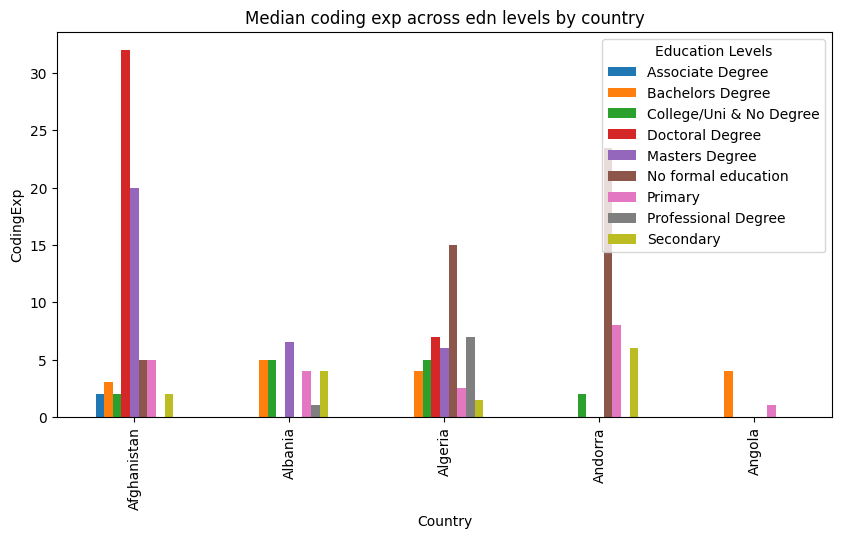

In [224]:
result = df.pivot_table(index = 'Country', columns = 'HighestEdLevel', values = 'CodingExp', aggfunc = 'median').sort_values(by = 'Country').head(5)
result.plot(kind='bar', figsize=(10, 5))
plt.title('Median coding exp across edn levels by country')
plt.xlabel('Country')  # label of x-axis
plt.ylabel('CodingExp') # label of y-axis
plt.legend(title='Education Levels')
plt.show() # render the chart

### What percentage of respondents work remotely versus on-site?



In [227]:
# Identify the unique non-NaN values in 'WorkLoc' col

df['WorkLoc'].unique()

array([nan, 'Home', 'Office',
       'Other place, such as a coworking space or cafe'], dtype=object)

In [228]:
# Count no. of remote/onsite/total working respondents

count_remote = df['WorkLoc'].isin(['Home', 'Other place, such as a coworking space or cafe']).sum()  # o/p : 29451
count_onsite = df['WorkLoc'].isin(['Office']).sum()  # o/p : 40588
count_total = count_remote + count_onsite  # o/p : 70039

pct_remote = round(count_remote / count_total * 100, 2)  # calc % of remote workers
pct_onsite = round(count_onsite / count_total * 100, 2)  # calc % of onsite workers

print(pct_remote, '% developers work remotely.', '\n', pct_onsite, '% developers work onsite.')

42.04 % developers work remotely. 
 57.96 % developers work onsite.


**Another solution**

In [229]:
tmpdf = df['WorkLoc'].value_counts(normalize = True)

In [230]:
offsite = tmpdf.loc[['Home', 'Other place, such as a coworking space or cafe']].sum()  # 0.42049...
onsite = tmpdf.loc['Office'].sum()  # 0.57950...
print(round(offsite * 100, 2), '% work offsite and', round(onsite * 100, 2), '% work onsite.')

42.04 % work offsite and 57.96 % work onsite.


### What percentage of respondents work remotely versus on-site in India?

In [231]:
df_indian_workers = df[df['Country'] == 'India'].groupby('WorkLoc').size()
df_indian_workers

# NOTE : 'size' is a PROPERTY in 'df.size' but is a METHOD in 'groupby([col_name]).size()

# 'size()' counts NaN rows too; 'count()' IGNORES NaN rows; the reason size() here is NOT returning the
# count of NaNs in o/p because 'groupby()' has already excluded NaN in the 'WorkLoc' col by default.

,0
WorkLoc,
Home,1636
Office,4382
"Other place, such as a coworking space or cafe",587


In [233]:
# Total no. of workers' rows for India
total_workers = df[df['Country'] == 'India'].groupby('WorkLoc').size().sum()    # groupby() excldues NaNs by default
total_workers     # o/p : 6605
# Following line gives same o/p as in above line
# df[df['Country'] == 'India']['WorkLoc'].isin(['Home', 'Office', 'Other place, such as a coworking space or cafe']).sum() # o/p : 6619

onsite = df_indian_workers.loc['Office']  # extracting count of 'Office' from above o/p
offsite = df_indian_workers.loc[['Home', 'Other place, such as a coworking space or cafe']].sum() # total off-site workers
print(round(onsite / total_workers * 100, 2), '% work onsite &', round(offsite / total_workers * 100, 2), '% work offsite in India.')

66.34 % work onsite & 33.66 % work offsite in India.


**Another solution**

In [234]:
workers_pct = df[df['Country'] == 'India']['WorkLoc'].value_counts(normalize = True)  # 'normalize' returns % composition
workers_pct
# In Line 1, 'value_counts()' ignores NaN rows unless 'dropna = False' is set within it

,proportion
WorkLoc,
Office,0.663437
Home,0.247691
"Other place, such as a coworking space or cafe",0.088872


In [235]:
home = round(workers_pct.loc['Home'] * 100, 2)  # 24.76
other = round(workers_pct.loc['Other place, such as a coworking space or cafe'] * 100, 2)  # 8.88
office = round(workers_pct.loc['Office'] * 100, 2)  # 66.34

print(home + other, '% work remotely and', office, '% work onsite in India.')

33.66 % work remotely and 66.34 % work onsite in India.


### What are the most commonly used fullstack technologies?

In [236]:
df['LanguageWorkedWith'].value_counts(normalize = True).head(10).rename('PCT')
# NOTE how 'proportion' is renamed to 'PCT' (for percentage composition)
# Col renaming for series raises error if done as 'series.rename({oldname : newname})'

,PCT
LanguageWorkedWith,
HTML/CSS;JavaScript;PHP;SQL,0.017170
C#;HTML/CSS;JavaScript;SQL,0.016423
HTML/CSS;JavaScript,0.013970
C#;HTML/CSS;JavaScript;SQL;TypeScript,0.011529
HTML/CSS;JavaScript;PHP,0.010466
Java,0.010372
HTML/CSS;JavaScript;TypeScript,0.008153
Python,0.007919
HTML/CSS;Java;JavaScript;SQL,0.007791


### How many respondents from the United States and India are job seekers?

In [90]:
# Hardcoded solution

job_seeker_count = 0
for i in range(1, df.shape[0] + 1):
  if df.loc[i, 'Country'] in ['India', 'USA'] and df.loc[i, 'SeekingJob'] == 'Yes':
    job_seeker_count += 1
job_seeker_count

4920

In [ ]:
# Separate counts

df.groupby(['Country', 'SeekingJob']).get_group(('India', 'Yes')).shape[0]  # o/p: 2387
df.groupby(['Country', 'SeekingJob']).get_group(('USA', 'Yes')).shape[0]  # o/p: 2533

In [91]:
# Another way

# First filtering only rows have 'India' & 'USA' in 'Country' col, then extracting rows having 'SeekingJob = Yes' and
# finally applying 'shape' property with index 0 to extract final no. of rows

df[(df['Country'].isin(['India', 'USA']))][df['SeekingJob'] == 'Yes'].shape[0]

<ipython-input-91-a2615e9b8708>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[(df['Country'].isin(['India', 'USA']))][df['SeekingJob'] == 'Yes'].shape[0]


4920

In [81]:
# Another way

tmp_df = df[(df['Country'].isin(['India', 'USA']))]
ans_df = tmp_df.groupby('Country')['SeekingJob'].value_counts()
ans_df

Country  SeekingJob
India    Casually       4845
         Yes            2387
         No              880
USA      Casually      10450
         No             6109
         Yes            2533
Name: count, dtype: int64

In [82]:
ans_df.loc['India', 'Yes'] + ans_df.loc['USA', 'Yes']

4920

In [94]:
# Another way

temp_df = df[(df['Country'].isin(['India', 'USA']))]
temp_df[temp_df['SeekingJob'] == 'Yes'].shape[0]

4920

In [78]:
# The 'get_group()' method can access ONLY a single group from a 'groupby' object. However, multiple groups can be accessed
# at once ITERATIVELY using a for-loop as shown ahead.

grouped = df.groupby('Country')
countries_to_get = ['USA', 'India']
result = pd.concat([grouped.get_group(country) for country in countries_to_get])  # NOTE this step
result[result['SeekingJob'] == 'Yes'].shape[0]

4920

In [57]:
# Another way

grouped = df.groupby(['Country', 'SeekingJob'])
grouped.get_group(('India', 'Yes')).shape[0] + grouped.get_group(('USA', 'Yes')).shape[0]

4920

### How many male developers were using python in India (as per the SOF 2019 survey)?

In [24]:
# %%time yields the run time of this soln
%%time

# Directly extracting ans from df
fltr = (df['LanguageWorkedWith'] == 'Python') & (df['Gender'] == 'Male') & (df['Country'] == 'India') & (df['MainBranch'].str.contains('Developer'))
df.loc[fltr].shape[0]  # o/p: 63

CPU times: user 66.8 ms, sys: 1.41 ms, total: 68.2 ms
Wall time: 68 ms


63

**Another solution**

In [29]:
# %%timeit runs this cell more than once to calc run time
%%time

# Creating new frame 'ind_grp' having all 'India' rows
ind_grp = df.groupby('Country').get_group('India')

# Creating filter 'fltr'
fltr = (ind_grp['LanguageWorkedWith'] == 'Python') & (ind_grp['Gender'] == 'Male') & (ind_grp['MainBranch'].str.contains('Developer'))

# Applying filter 'fltr' on fram 'ind_grp'
ind_grp[fltr].shape[0]    # o/p: 63

CPU times: user 26 ms, sys: 0 ns, total: 26 ms
Wall time: 26.5 ms


63

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# # Importing the cleaned file
# df = pd.read_csv('/content/surveyresults2019_cleaned.csv')
# df.set_index('Respondent', inplace = True)   # Values of index column are used to access rows
# pd.set_option('display.max_columns', df.shape[1])  # Default no. of cols visible = 20; we want to see all 24 cols here

## **NOTES**


**GROUPBY()**

```
cntry_grp = df.groupby(['Country'])
```
```
cntry_grp.ngroups  # o/p : 178   (no. of groups formed)
cntry_grp.size()  # o/p is country col as index and a 'count of rows' col for each country
cntry_grp.size().max()  # o/p : 20894 (max no. of rows for a group)
cntry_grp.size().idxmax() # o/p: 'United States' (Index with max no. of rows)
cntry_grp.size().min()
cntry_grp.size().idxmin()
cntry_grp.size().sort_values(ascending = False).head(3) # o/p is top-3 countries with highest no. of rows
```
```
df.groupby(['Country']).get_group('India)['SalaryUSD'].mean()
```


---



**UNSTACK()**

It's used to pivot a level of a multi-level index (row index) into columns.

**Parameters of unstack()**

**level**: Specifies level(s) of the index to unstack.
Can be an integer (for positional indexing), a string (for name-based indexing), or a list of integers/strings for multiple levels.
**Default**: -1 (the last level of the index).

**fill_value**: Specifies a value to replace NaN (missing data) in the resulting DataFrame. **Default**: None.

```
SYNTAX:
df.unstack(level='Country', fill_value = 0.00)
df.unstack(level='-1', fill_value = 0.00)
```


---



**PIVOT_TABLE()**


```
SYNTAX:
df.pivot_table(data=None, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False,
margins_name='All', dropna=True, observed=False, sort=True)
```

**Params:**

data : dataframe used for pivoting; usually ommitted.

values : cols to aggregate; if None, all num cols aggregated; type string or list of strings.

index : cols to use as rows of pivot table; type string or list of strings

columns : serve as cols of table; type string or list of strings.

aggfunc : fn to aggregate data (e.g. 'mean', 'sum', 'count'); DEFAULT is 'mean'.

fill_value : val to replace NaN in o/p table. DEFAULT is None.

margins : add row/col totals; type boolean; DEFAULT is False.

margins_name : name of margins col/row; DEFAULT is 'All'.

dropna : drops COLS having ALL vals None; type boolean; DEFAULT is True.

observed : whether to show only observed vals for categorical data; type boolean; DEFAULT is False.

sort : sorts table by index and col; type boolean; DEFAULT is True.


---

